# `The Vanishing/Exploding Gradients Problems`
 * The vanishing gradients problem occurs when the gradients of the loss function with respect to the parameters become extremely small during backpropagation.
 * Conversely, the exploding gradients problem arises when the gradients of the loss function grow exponentially as they propagate backward through the layers during backpropagation.


## Weight Initialization
 * Proper initialization of network weights can help alleviate both vanishing and exploding gradients problems. 
 * Techniques like __Xavier__ initialization and __He__ initialization are commonly used to ensure that the weights are initialized in a way that keeps the signal propagated through the network.

In [ ]:
# Importing essential package
import numpy as np
import tensorflow as tf
from tensorflow import keras

# List comprehension to get the names of initializers in Keras without underscores
initializer_names = [name for name in dir(keras.initializers) if not name.startswith("_")]

# Printing the initializer names
print(initializer_names)

['Constant', 'GlorotNormal', 'GlorotUniform', 'HeNormal', 'HeUniform', 'Identity', 'Initializer', 'LecunNormal', 'LecunUniform', 'Ones', 'Orthogonal', 'RandomNormal', 'RandomUniform', 'TruncatedNormal', 'VarianceScaling', 'Zeros', 'constant', 'deserialize', 'get', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform', 'identity', 'lecun_normal', 'lecun_uniform', 'ones', 'orthogonal', 'random_normal', 'random_uniform', 'serialize', 'truncated_normal', 'variance_scaling', 'zeros']


* Creating a dense layer with built-in initializers

In [ ]:
# Creating a dense layer with 10 units, ReLU activation, and He normal weight initialization
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

* Defining an initializer with Variance Scaling (custom kernel initializer)

In [ ]:
# Defining an initializer with Variance Scaling
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')

# Creating a dense layer with 10 units, ReLU activation, and custom kernel initializer
dense_layer = keras.layers.Dense(10, activation="relu", kernel_initializer=init)

## Nonsaturating Activation Functions
 * Non-saturating activation functions refer to activation functions that do not suffer from the vanishing gradient problem to the same extent as traditional saturating activation functions like sigmoid and tanh. These functions typically have gradients that do not diminish as quickly as the __sigmoid__ or __tanh__ functions for large input values, thereby alleviating the vanishing gradient problem. 
 * One prominent example of a non-saturating activation function is the Rectified Linear Unit (__ReLU__) and its variants.

1. __Rectified Linear Unit (ReLU):__
    * ReLU is a popular activation function in deep learning, defined as __f(x)=max(0,x)__. It outputs zero for negative inputs and passes positive inputs unchanged. 
    * It's computationally efficient and doesn't suffer from vanishing gradients for positive inputs. However, it may lead to the __"dying ReLU"__ problem, causing neurons to become inactive for negative inputs. 
    * Variants like __Leaky ReLU__, __Parametric ReLU (PReLU)__, and __Exponential Linear Unit (ELU)__ address this issue by allowing a small, non-zero gradient for negative inputs.

In [ ]:
# Listing ReLU variants in Keras.layers module
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

2. __Leaky ReLU:__
    * Leaky ReLU is an activation function similar to ReLU but with a small, non-zero gradient for negative input values. 
    * It's defined as __f(x)=max(αx,x)__, where α is a small constant (e.g., 0.01). 
    * Leaky ReLU addresses the __"dying ReLU"__ problem by preventing neurons from becoming inactive for negative inputs during training. It retains the efficiency of ReLU while mitigating its limitations.

In [7]:
# Training a neural network on Fashion MNIST using the Leaky ReLU:

# Loading Fashion MNIST dataset and preprocessing
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Setting random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Defining the neural network model with Leaky ReLU activation
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),  # Leaky ReLU activation
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),  # Leaky ReLU activation
    keras.layers.Dense(10, activation="softmax")
])

# Compiling the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

# Training the model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.2537 - accuracy: 0.5988 - val_loss: 0.8649 - val_accuracy: 0.7186
Epoch 2/10
 333/1719 [====>.........................] - ETA: 3s - loss: 0.8565 - accuracy: 0.7220

3. __Parametric ReLU:__
    * Parametric ReLU (PReLU) extends Leaky ReLU by allowing the coefficient α to be learned during training rather than fixed. PReLU can adaptively adjust the leakage for negative inputs based on data, potentially improving performance over fixed coefficients.

In [ ]:
# Training a neural network on Fashion MNIST using the Leaky PReLU:

# Loading Fashion MNIST dataset and preprocessing
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Setting random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Defining the neural network model with Leaky ReLU activation
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

# Compiling the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

# Training the model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 1ms/step - loss: 1.3504 - accuracy: 0.5968 - val_loss: 0.9022 - val_accuracy: 0.7100
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.8050 - accuracy: 0.7419 - val_loss: 0.7154 - val_accuracy: 0.7670
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6840 - accuracy: 0.7787 - val_loss: 0.6437 - val_accuracy: 0.7876
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6213 - accuracy: 0.7953 - val_loss: 0.5873 - val_accuracy: 0.8026
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5810 - accuracy: 0.8070 - val_loss: 0.5535 - val_accuracy: 0.8164
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5522 - accuracy: 0.8139 - val_loss: 0.5298 - val_accuracy: 0.8234
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5306 - accuracy: 0.8199 - val_loss: 0.5099 - val_accuracy:

4. __Exponential Linear Unit (ELU):__
    * ELU is defined as f(x)=x if x≥0 and f(x)=α(e^x−1) if x<0, where α is a small positive constant.
    * ELU behaves similarly to ReLU for positive input values but has a smooth curve for negative input values, allowing it to handle negative inputs more gracefully than ReLU. 
    * ELU also prevents the "dying ReLU" problem by ensuring a non-zero gradient for all inputs.

In [ ]:
# Training a neural network on Fashion MNIST using the Leaky PReLU:

# Loading Fashion MNIST dataset and preprocessing
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Setting random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Defining the neural network model with Leaky ReLU activation
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal", activation="elu"),
    keras.layers.Dense(100, kernel_initializer="he_normal", activation="elu"),
    keras.layers.Dense(10, activation="softmax")
])

# Compiling the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

# Training the model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.1114 - accuracy: 0.6441 - val_loss: 0.7819 - val_accuracy: 0.7482
Epoch 2/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7236 - accuracy: 0.7634 - val_loss: 0.6526 - val_accuracy: 0.7878
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6358 - accuracy: 0.7896 - val_loss: 0.6006 - val_accuracy: 0.8024
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5887 - accuracy: 0.8041 - val_loss: 0.5570 - val_accuracy: 0.8140
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5581 - accuracy: 0.8128 - val_loss: 0.5321 - val_accuracy: 0.8280
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5357 - accuracy: 0.8192 - val_loss: 0.5130 - val_accuracy: 0.8320
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5183 - accuracy: 0.8246 - val_loss: 0.4969 - val_accuracy:

5. __Scaled Exponential Linear Unit (SELU):__
    * It's an activation function introduced to address the vanishing/exploding gradient problem while promoting self-normalizing properties in neural networks.
    * SELU has a self-normalizing property, meaning the output distribution remains close to mean 0 and standard deviation 1, which helps stabilize training.
    * It overcomes the vanishing/exploding gradient problem by promoting stable mean and variance propagation through the network.
    * It has an exponential component for negative inputs, ensuring non-zero gradients, thus avoiding the "dying ReLU" problem.
    * SELU is specifically designed for feedforward neural networks, and its performance may vary depending on the architecture and hyperparameters.

In [ ]:
# Training a neural network on Fashion MNIST using the Leaky SeLU:

# Loading Fashion MNIST dataset and preprocessing
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
# Scaling pixel values to the range [0, 1]
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
# Splitting training set into validation and training subsets
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Calculating mean and standard deviation of training pixel values
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
# Standardizing the input features using mean and standard deviation
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

# Setting random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Constructing the neural network model with SELU activation
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"))
# Adding 99 hidden layers with SELU activation
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
# Adding output layer with softmax activation for 10 classes
model.add(keras.layers.Dense(10, activation="softmax"))

# Compiling the model with sparse categorical crossentropy loss and SGD optimizer
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

# Training the model on scaled training data for 5 epochs with validation data for monitoring
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 36s 20ms/step - loss: 1.3252 - accuracy: 0.4923 - val_loss: 1.0440 - val_accuracy: 0.5922
Epoch 2/5
1719/1719 [==============================] - 37s 22ms/step - loss: 0.8742 - accuracy: 0.6761 - val_loss: 0.6652 - val_accuracy: 0.7656
Epoch 3/5
1719/1719 [==============================] - 38s 22ms/step - loss: 1.0586 - accuracy: 0.6026 - val_loss: 0.8854 - val_accuracy: 0.6582
Epoch 4/5
1719/1719 [==============================] - 38s 22ms/step - loss: 0.8120 - accuracy: 0.6931 - val_loss: 0.7537 - val_accuracy: 0.7324
Epoch 5/5
1719/1719 [==============================] - 38s 22ms/step - loss: 0.7184 - accuracy: 0.7357 - val_loss: 0.6326 - val_accuracy: 0.7668


## Batch Normalization
 * Batch Normalization is a technique used in deep learning to enhance the training process of neural networks. 
 * This means that it adjusts the activations of each layer so that they have a mean of zero and a standard deviation of one. By doing this normalization, Batch Normalization helps to stabilize the training process and improve the speed at which neural networks converge to an optimal solution.

 * Batch Normalization has become a standard technique in deep learning because it contributes to __faster training__, __improved model performance__, and __greater stability__ during the training process.

In [ ]:
# Training a neural network on Fashion MNIST using the Batch Normalization:

# Loading Fashion MNIST dataset and preprocessing
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
# Scaling pixel values to the range [0, 1]
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
# Splitting training set into validation and training subsets
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


# Setting random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Define a Sequential model
model = keras.models.Sequential([
    # Flatten layer to convert 2D input into 1D
    keras.layers.Flatten(input_shape=[28, 28]),
    # BatchNormalization layer applied after the Flatten layer
    keras.layers.BatchNormalization(),
    # Dense layer with 300 neurons and ReLU activation function
    keras.layers.Dense(300, activation="relu"),
    # BatchNormalization layer applied after the first Dense layer
    keras.layers.BatchNormalization(),
    # Dense layer with 100 neurons and ReLU activation function
    keras.layers.Dense(100, activation="relu"),
    # BatchNormalization layer applied after the second Dense layer
    keras.layers.BatchNormalization(),
    # Dense layer with 10 neurons and softmax activation function for classification
    keras.layers.Dense(10, activation="softmax")
])

# Compiling the model with sparse categorical crossentropy loss and SGD optimizer
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

# Training the model on training data for 10 epochs with validation data for monitoring
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8471 - accuracy: 0.7150 - val_loss: 0.5629 - val_accuracy: 0.8084
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5730 - accuracy: 0.8020 - val_loss: 0.4867 - val_accuracy: 0.8360
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5208 - accuracy: 0.8177 - val_loss: 0.4511 - val_accuracy: 0.8460
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4812 - accuracy: 0.8330 - val_loss: 0.4282 - val_accuracy: 0.8500
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4570 - accuracy: 0.8395 - val_loss: 0.4129 - val_accuracy: 0.8550
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4399 - accuracy: 0.8444 - val_loss: 0.3995 - val_accuracy: 0.8590
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4237 - accuracy: 0.8519 - val_loss: 0.3885 - val_accuracy:

In [ ]:
# Display a summary of the model architecture
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_256 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_7 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_257 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_8 (Batc  (None, 100)            

In [ ]:
# Retrieve the BatchNormalization layer after the first layer in the model
bn1 = model.layers[1]

# List the names and trainability of the variables in the BatchNormalization layer
# This can be useful for inspecting the variables of the BatchNormalization layer
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization_6/gamma:0', True),
 ('batch_normalization_6/beta:0', True),
 ('batch_normalization_6/moving_mean:0', False),
 ('batch_normalization_6/moving_variance:0', False)]

### Batch Normalization: Before or After Activation?
* Applying Batch Normalization (BN) __before__ the __activation function__ is a debated topic in deep learning. While sometimes it yields __better results__, it's subject to discussion. Additionally, it's common practice to omit bias terms in layers preceding BatchNormalization. Since BatchNormalization introduces its own bias parameters, setting __use_bias=False__ for these preceding layers avoids redundant parameters and optimizes model efficiency.

In [ ]:
# Training a neural network on Fashion MNIST using the Batch Normalization before the activation function:

# Loading Fashion MNIST dataset and preprocessing
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
# Scaling pixel values to the range [0, 1]
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
# Splitting training set into validation and training subsets
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


# Setting random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Define a Sequential model
model = keras.models.Sequential([
    # Flatten layer to convert 2D input into 1D
    keras.layers.Flatten(input_shape=[28, 28]),
    # BatchNormalization layer applied before the activation function
    keras.layers.BatchNormalization(),
    # Dense layer with 300 neurons and no bias term
    keras.layers.Dense(300, use_bias=False),
    # BatchNormalization layer applied before the activation function
    keras.layers.BatchNormalization(),
    # Activation function ReLU applied
    keras.layers.Activation("relu"), 
    # Dense layer with 100 neurons and no bias term
    keras.layers.Dense(100, use_bias=False),
    # BatchNormalization layer applied before the activation function
    keras.layers.BatchNormalization(),
    # Activation function ReLU applied
    keras.layers.Activation("relu"),
    # Dense layer with 10 neurons and softmax activation function for classification
    keras.layers.Dense(10, activation="softmax")
])

# Compiling the model with sparse categorical crossentropy loss and SGD optimizer
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

# Training the model on training data for 10 epochs with validation data for monitoring
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0467 - accuracy: 0.6695 - val_loss: 0.6839 - val_accuracy: 0.7888
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6864 - accuracy: 0.7788 - val_loss: 0.5597 - val_accuracy: 0.8242
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5994 - accuracy: 0.8026 - val_loss: 0.5008 - val_accuracy: 0.8384
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5453 - accuracy: 0.8191 - val_loss: 0.4648 - val_accuracy: 0.8500
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5108 - accuracy: 0.8269 - val_loss: 0.4413 - val_accuracy: 0.8546
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4889 - accuracy: 0.8337 - val_loss: 0.4242 - val_accuracy: 0.8578
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4717 - accuracy: 0.8372 - val_loss: 0.4099 - val_accuracy:

## Gradient Clipping
 * Gradient clipping addresses exploding gradients problem by imposing a constraint on the gradients during training. Specifically, it involves scaling the gradients if their norm exceeds a certain threshold.
 
 
 * __Gradient Clipping With clipvalue__: Each component of the gradient vector is individually scaled if it falls outside a specified range. This technique restricts the magnitude of each gradient component without necessarily preserving the overall direction of the gradient vector.
 
 * __Gradient Clipping With clipnorm__: The entire gradient vector is scaled down if its norm exceeds a specified threshold. This ensures that the direction of the gradient vector is preserved while preventing it from becoming too large.

  * If you want to ensure that Gradient Clipping does not change the direction of the gradient vector, you should clip by norm by setting clipnorm instead of clipvalue.

 * Gradient clipping is commonly used in recurrent neural networks (RNNs) because Batch Normalization (BN) is difficult to implement in RNNs. However, for other network types, like feedforward or convolutional neural networks (CNNs), Batch Normalization is usually sufficient.


In [ ]:
# Set optimizer with gradient clipping by clipvalue
optimizer = keras.optimizers.SGD(clipvalue=1.0)

# Set optimizer with gradient clipping by clipnorm
optimizer = keras.optimizers.SGD(clipnorm=1.0)

# `Reusing Pretrained Layers`
* Reusing pretrained layers, often referred to as transfer learning, is a common technique in machine learning where a model trained on one task is adapted for use on a new, related task. 
* This approach is particularly effective when the pretrained model has been trained on a large dataset, as it has learned general features that can be useful for other tasks.
* Transfer learning does __`not`__ work as well with __`small`__, densely connected neural networks. This is because these networks learn only a few specific patterns, which aren't very useful for other tasks. On the other hand, transfer learning works __`best`__ with __`deep convolutional neural networks (CNN)`__. These networks are better at learning general features, especially in the lower layers, making them more useful for different tasks.

Let's split the fashion MNIST training set in two:
* `X_train_A`: all images of all items except for sandals and shirts (classes 5 and 6).
* `X_train_B`: a much smaller training set of just the first 200 images of sandals or shirts.

The validation set and the test set are also split this way, but without restricting the number of images.

We will train a model on set A (classification task with 8 classes), and try to reuse it to tackle set B (binary classification). We hope to transfer a little bit of knowledge from task A to task B, since classes in set A (sneakers, ankle boots, coats, t-shirts, etc.) are somewhat similar to classes in set B (sandals and shirts). However, since we are using `Dense` layers, only patterns that occur at the same location can be reused (in contrast, convolutional layers will transfer much better, since learned patterns can be detected anywhere on the image, as we will see in the CNN chapter).

In [ ]:
# Creating set A and set B

# Loading Fashion MNIST dataset and preprocessing
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Scaling pixel values to the range [0, 1]
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Splitting training set into validation and training subsets
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Splitter of the dataset into two subsets
def split_dataset(X, y):

    # Creating masks for classes 5 (sandals) and 6 (shirts)
    y_5_or_6 = (y == 5) | (y == 6)
    # Subsetting dataset into classes A (excluding classes 5 and 6) and B (only classes 5 and 6)
    y_A = y[~y_5_or_6]
    # Adjusting class indices for class A to maintain continuity
    y_A[y_A > 6] -= 2  # class indices 7, 8, 9 should be moved to 5, 6, 7
    # For class B, creating a binary classification task: 1 for shirts (class 6), 0 otherwise
    y_B = (y[y_5_or_6] == 6).astype(np.float32)
    
    return ((X[~y_5_or_6], y_A), (X[y_5_or_6], y_B))

# Splitting datasets into subsets for classes A and B
(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)

# Limiting class B training set to 200 samples for efficiency
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

# Print the shape of the training data for the model B
print(X_train_B.shape)

(200, 28, 28)


In [ ]:
# Training a neural network on set A (Fashion MNIST)

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Define the architecture of model_A
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

# Compile the model with loss function, optimizer, and metrics
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

# Train the model on training data and validate on validation data
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

# Save the trained model
model_A.save("my_model_A.h5")

Epoch 1/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.5989 - accuracy: 0.8164 - val_loss: 0.3967 - val_accuracy: 0.8642
Epoch 2/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.3614 - accuracy: 0.8765 - val_loss: 0.3296 - val_accuracy: 0.8832
Epoch 3/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.3221 - accuracy: 0.8887 - val_loss: 0.3016 - val_accuracy: 0.8931
Epoch 4/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.3018 - accuracy: 0.8961 - val_loss: 0.2878 - val_accuracy: 0.8971
Epoch 5/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2880 - accuracy: 0.9009 - val_loss: 0.2764 - val_accuracy: 0.9033
Epoch 6/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2774 - accuracy: 0.9043 - val_loss: 0.2725 - val_accuracy: 0.9016
Epoch 7/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2688 - accuracy: 0.9081 - val_loss: 0.2662 - val_accuracy:

In [ ]:
# Displaying model A summary
model_A.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_262 (Dense)           (None, 300)               235500    
                                                                 
 dense_263 (Dense)           (None, 100)               30100     
                                                                 
 dense_264 (Dense)           (None, 50)                5050      
                                                                 
 dense_265 (Dense)           (None, 50)                2550      
                                                                 
 dense_266 (Dense)           (None, 50)                2550      
                                                                 
 dense_267 (Dense)           (None, 8)               

In [ ]:
# Training a neural network on set B (Fashion MNIST)

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Define the architecture of model_B
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

# Compiling the model with binary_crossentropy loss and SGD optimizer
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

# Training the model with training data and validating it with validation data
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 33ms/step - loss: 0.6229 - accuracy: 0.6900 - val_loss: 0.4415 - val_accuracy: 0.8387
Epoch 2/20
7/7 [==============================] - 0s 10ms/step - loss: 0.3835 - accuracy: 0.8900 - val_loss: 0.3447 - val_accuracy: 0.8945
Epoch 3/20
7/7 [==============================] - 0s 10ms/step - loss: 0.2951 - accuracy: 0.9550 - val_loss: 0.2833 - val_accuracy: 0.9331
Epoch 4/20
7/7 [==============================] - 0s 10ms/step - loss: 0.2382 - accuracy: 0.9750 - val_loss: 0.2401 - val_accuracy: 0.9473
Epoch 5/20
7/7 [==============================] - 0s 10ms/step - loss: 0.1990 - accuracy: 0.9900 - val_loss: 0.2098 - val_accuracy: 0.9625
Epoch 6/20
7/7 [==============================] - 0s 10ms/step - loss: 0.1701 - accuracy: 0.9900 - val_loss: 0.1866 - val_accuracy: 0.9655
Epoch 7/20
7/7 [==============================] - 0s 10ms/step - loss: 0.1491 - accuracy: 0.9950 - val_loss: 0.1690 - val_accuracy: 0.9726
Epoch 8/20
7/7 [===========

In [ ]:
# Displaying model B summary
model_B.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_268 (Dense)           (None, 300)               235500    
                                                                 
 dense_269 (Dense)           (None, 100)               30100     
                                                                 
 dense_270 (Dense)           (None, 50)                5050      
                                                                 
 dense_271 (Dense)           (None, 50)                2550      
                                                                 
 dense_272 (Dense)           (None, 50)                2550      
                                                                 
 dense_273 (Dense)           (None, 1)               

In [ ]:
# Utilizing pre-trained layers from model A to initialize and enhance the 
# training of a new neural network on dataset B.

# Loading model A
model_A = keras.models.load_model("my_model_A.h5")

# Cloning model A to avoid shared layers during training
model_A_clone = keras.models.clone_model(model_A) # Clone model A to preserve its architecture
model_A_clone.set_weights(model_A.get_weights()) # Set the weights of the cloned model to match those of model A
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1]) # Create model B based on model A by using all layers except the last one
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid")) # Add a new Dense layer with sigmoid activation to model B

# Freezing layers of model B on A for initial training
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

# Compiling and training model B on A
model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

# Unfreezing layers of model B on A for further training
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

# Compiling and continuing training of model B on A
model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 32ms/step - loss: 1.9930 - accuracy: 0.1250 - val_loss: 1.8582 - val_accuracy: 0.1562
Epoch 2/4
7/7 [==============================] - 0s 9ms/step - loss: 1.8310 - accuracy: 0.1400 - val_loss: 1.7122 - val_accuracy: 0.1917
Epoch 3/4
7/7 [==============================] - 0s 9ms/step - loss: 1.6840 - accuracy: 0.1900 - val_loss: 1.5796 - val_accuracy: 0.2323
Epoch 4/4
7/7 [==============================] - 0s 10ms/step - loss: 1.5506 - accuracy: 0.2250 - val_loss: 1.4527 - val_accuracy: 0.2667
Epoch 1/16
7/7 [==============================] - 1s 33ms/step - loss: 1.1641 - accuracy: 0.3650 - val_loss: 0.7693 - val_accuracy: 0.5243
Epoch 2/16
7/7 [==============================] - 0s 10ms/step - loss: 0.6407 - accuracy: 0.6500 - val_loss: 0.5100 - val_accuracy: 0.7698
Epoch 3/16
7/7 [==============================] - 0s 10ms/step - loss: 0.4365 - accuracy: 0.8300 - val_loss: 0.3798 - val_accuracy: 0.8692
Epoch 4/16
7/7 [=================

In [ ]:
# Evaluating model B and model B on A on test set B
print(model_B.evaluate(X_test_B, y_test_B))
print(model_B_on_A.evaluate(X_test_B, y_test_B))

63/63 [==============================] - 0s 1ms/step - loss: 0.0848 - accuracy: 0.9825
[0.08476961404085159, 0.9825000166893005]
63/63 [==============================] - 0s 1ms/step - loss: 0.0910 - accuracy: 0.9835
[0.09095914661884308, 0.9835000038146973]


# `Faster Optimizers`

### 1. Momentum optimization
 * Momentum optimization `accelerates` gradient descent by accumulating past gradients, helping to navigate towards the minimum loss faster.
 * Momentum optimization requires careful tuning of hyperparameters such as the momentum coefficient Poorly chosen values can lead to suboptimal performance or instability in the optimization process.

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

### 2. Nesterov Accelerated Gradient
* Nesterov Accelerated Gradient, also known as Nesterov momentum or Nesterov `accelerated` gradient descent (NAG), is an enhancement of the standard momentum optimization algorithm.
* In essence, Nesterov Accelerated Gradient computes the gradient not at the current position but slightly ahead in the direction of the momentum. This anticipatory step helps to provide a more accurate estimate of the gradient, allowing for smoother and faster convergence.

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

### 3. AdaGrad
* In AdaGrad, the adjustment of learning rates for each parameter is based on the accumulated squared gradients, effectively reducing the learning rate in directions where gradients historically have been large. This adaptivity enables smaller steps in steep directions, such as those encountered in the elongated bowl problem, where traditional gradient descent may struggle. By decreasing step sizes along steeper gradients, AdaGrad facilitates more efficient progress towards the global optimum, addressing directional challenges early in the optimization process.
* AdaGrad works well for simple problems but often stops too early in training neural networks because it reduces the learning rate too much, preventing further progress toward the best solution.
* Despite Keras offering the Adagrad optimizer, it's advisable `not` to employ it for training deep neural networks.

In [ ]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

### 4. RMSProp
* As observed, AdaGrad's tendency to slow down too quickly can prevent convergence to the global optimum. RMSProp addresses this issue by accumulating gradients only from the most recent iterations.
* The decay rate (rho), often set to 0.9, is a new hyperparameter in RMSProp. However, this default value often performs well, eliminating the need for tuning in many cases.
* This optimizer almost always performs much `better` than AdaGrad.

In [ ]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

### 5. Adam Optimization
* Adam `combines` the advantages of both `AdaGrad` and `RMSProp`. 
* It maintains adaptive learning rates for each parameter and also keeps track of exponentially decaying average of past gradients and their squares. 
* This allows Adam to converge quickly and efficiently, even in the presence of noisy gradients, and it is widely used in practice due to its robustness and ease of use.
* The momentum decay hyperparameter __β1__ is typically initialized to __0.9__, while the scaling decay hyperparameter __β2__ is often initialized to __0.999__.

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

### 5.1. AdaMax Optimization
* AdaMax is an adaptation of Adam optimization designed to mitigate certain drawbacks of Adam, especially when adaptive learning rates become too aggressive. 
* In AdaMax, instead of computing the second moment of the gradients using squared gradients as in Adam, AdaMax uses the ℓ∞ norm of the gradients. The ℓ∞ norm, also known as the maximum norm, calculates the maximum absolute value of the elements in a vector.

In [ ]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

### 5.2. Nadam Optimization
* Nadam, short for Nesterov-accelerated Adaptive Moment Estimation, is an optimization algorithm that `combines` the benefits of `Nesterov momentum` and the adaptive learning rates of `Adam`.
* Nadam is particularly effective in optimizing deep neural networks, where it can achieve faster convergence and better generalization compared to traditional gradient-based optimization algorithms. Its ability to combine the benefits of adaptive learning rates and Nesterov momentum makes it a popular choice for training deep neural networks in practice.

In [ ]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

### 6. Learning Rate Scheduling
* The learning schedule, or learning rate schedule, is a strategy used in training machine learning models, like neural networks. 
* It involves adjusting the learning rate during training to strike a balance between exploration and fine-tuning, and between stability and speed. 
* There are various types of learning rate schedules, including fixed, time-based, step-based, exponential, piecewise, and cyclical schedules.
* The choice of schedule depends on factors such as model complexity and dataset size.


#### 6.1. Power Scheduling
* It involves reducing the learning rate according to a `power-law` schedule over time. The formula for power scheduling is:
$$ 
lr = \frac{lr_0}{(1 + \frac{t}{s})^{\text{c}}} 
$$
* Power scheduling gradually decreases the learning rate over time, allowing the model to converge more smoothly as training progresses. The decay and power parameters control how quickly and steeply the learning rate decreases.
* Keras uses `c=1` and `s = 1 / decay`


In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

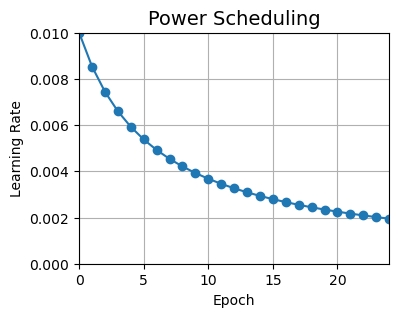

In [21]:
import math
import matplotlib.pyplot as plt
import numpy as np

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_epochs = 25
n_steps_per_epoch = math.ceil(55000 / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

fig = plt.figure(figsize=(4, 3))  # Width: 8 inches, Height: 6 inches
plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [5]:
# Training a neural network on Fashion MNIST using Power scheduling:

# Importing essential package
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Loading Fashion MNIST dataset and preprocessing
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
# Scaling pixel values to the range [0, 1]
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
# Splitting training set into validation and training subsets
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
# Calculating mean and standard deviation of training pixel values
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
# Standardizing the input features using mean and standard deviation
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

# Setting random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Define the optimizer with power scheduling
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

# Define a Sequential model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

# Compile the model with sparse categorical crossentropy loss and the optimizer
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Number of epochs for training
n_epochs = 25

# Train the model using the training set and validate using the validation set
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))


Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4870 - accuracy: 0.8293 - val_loss: 0.4046 - val_accuracy: 0.8624
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3787 - accuracy: 0.8654 - val_loss: 0.3708 - val_accuracy: 0.8718
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3458 - accuracy: 0.8775 - val_loss: 0.3738 - val_accuracy: 0.8712
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3244 - accuracy: 0.8841 - val_loss: 0.3486 - val_accuracy: 0.8792
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3096 - accuracy: 0.8902 - val_loss: 0.3438 - val_accuracy: 0.8796
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2958 - accuracy: 0.8941 - val_loss: 0.3405 - val_accuracy: 0.8826
Epoch 7/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2860 - accuracy: 0.8987 - val_loss: 0.3368 - val_accuracy:

#### 6.2. Exponential Scheduling
* The learning rate decreases gradually, decreasing by a factor of 10 after every s steps.
$$ 
lr = lr_0 \ 0.1^{\frac{t}{s}} 
$$
*  In contrast to power scheduling, which reduces the learning rate at a slower rate over time, exponential scheduling consistently reduces it by a factor of 10 after every s steps.

In [ ]:
# Define a function for exponential learning rate decay
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

# Set up exponential decay function with initial learning rate lr0=0.01 and s=20
exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [17]:
# Training a neural network on Fashion MNIST using Exponential scheduling:

# Importing essential package
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Loading Fashion MNIST dataset and preprocessing
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
# Scaling pixel values to the range [0, 1]
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
# Splitting training set into validation and training subsets
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
# Calculating mean and standard deviation of training pixel values
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
# Standardizing the input features using mean and standard deviation
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

# Setting random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Define a function for exponential learning rate decay
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

# Set up exponential decay function with initial learning rate lr0=0.01 and s=20
exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

# Define the model architecture
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

# Set number of epochs
n_epochs = 25

# Set up LearningRateScheduler callback using exponential decay function
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

# Train the model and record history
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8543 - accuracy: 0.7553 - val_loss: 1.0417 - val_accuracy: 0.7806 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8102 - accuracy: 0.7704 - val_loss: 0.5637 - val_accuracy: 0.8296 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6050 - accuracy: 0.8212 - val_loss: 0.7087 - val_accuracy: 0.8094 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5567 - accuracy: 0.8372 - val_loss: 0.5517 - val_accuracy: 0.8480 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5164 - accuracy: 0.8473 - val_loss: 0.5111 - val_accuracy: 0.8494 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4650 - accuracy: 0.8612 - val_loss: 0.5687 - val_accuracy: 0.8626 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 3s

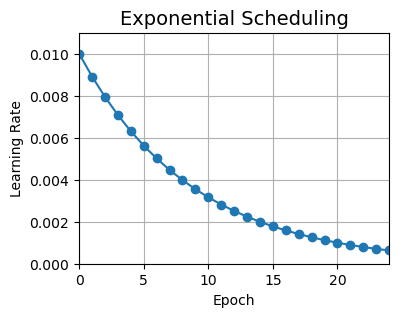

In [20]:
# # Monitoring learning rate decay over epochs

# Importing essential package
import matplotlib.pyplot as plt
import numpy as np

e = np.asarray(history.epoch)
h = np.asarray(history.history["lr"])

# Plot learning rate decay over epochs
fig = plt.figure(figsize=(4, 3))  # Width: 4 inches, Height: 3 inches
plt.plot(e, h, "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [31]:
# Training a neural network on Fashion MNIST using tf.keras Exponential scheduling

# Importing essential package
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Loading Fashion MNIST dataset and preprocessing
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
# Scaling pixel values to the range [0, 1]
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
# Splitting training set into validation and training subsets
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
# Calculating mean and standard deviation of training pixel values
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
# Standardizing the input features using mean and standard deviation
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

# Setting random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Define the neural network architecture using a Sequential model.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # Input layer: Flatten the 28x28 input images into a 1D array.
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),  # Hidden layer with 300 neurons, SELU activation function, and LeCun normal initialization.
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),  # Hidden layer with 100 neurons, SELU activation function, and LeCun normal initialization.
    keras.layers.Dense(10, activation="softmax")  # Output layer with 10 neurons (for class probabilities) and softmax activation function.
])

# Calculate the number of steps in 20 epochs (assuming batch size = 32).
s = 20 * len(X_train) // 32  
# Define a learning rate schedule with exponential decay starting at 0.01, decayed over 's' steps with a decay rate of 0.1.
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
# Define the optimizer with SGD (Stochastic Gradient Descent) and using the defined learning rate schedule.
optimizer = keras.optimizers.SGD(learning_rate)

# Compile the model with sparse categorical crossentropy loss function, SGD optimizer, and accuracy metric.
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])  

# Set the number of epochs for training.
n_epochs = 25  

# Fit the model to the training data without specifying any callbacks for dynamic learning rate adjustments.
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))  


Epoch 1/25
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4910 - accuracy: 0.8286 - val_loss: 0.4107 - val_accuracy: 0.8616
Epoch 2/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3826 - accuracy: 0.8653 - val_loss: 0.3725 - val_accuracy: 0.8752
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3479 - accuracy: 0.8771 - val_loss: 0.3734 - val_accuracy: 0.8714
Epoch 4/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3256 - accuracy: 0.8839 - val_loss: 0.3502 - val_accuracy: 0.8810
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3090 - accuracy: 0.8909 - val_loss: 0.3429 - val_accuracy: 0.8798
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2947 - accuracy: 0.8963 - val_loss: 0.3418 - val_accuracy: 0.8820
Epoch 7/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2841 - accuracy: 0.8999 - val_loss: 0.3356 - val_accuracy:

#### 6.3. Piecewise Constant Scheduling
*  It involves defining a sequence of learning rates and corresponding epochs, where each learning rate is used for a certain number of epochs before switching to the next one. 
* This method provides finer control over the optimization process, potentially leading to more stable convergence and improved performance. 
* By utilizing a learning rate scheduler callback, the model automatically adjusts the learning rate based on the predefined schedule during training.

In [ ]:
# Define a function for Simple Piecewise Constant Scheduling
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [ ]:
# Define a function for Piecewise Constant Scheduling
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [22]:
# Training a neural network on Fashion MNIST using Piecewise Constant Scheduling

# Importing essential package
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Loading Fashion MNIST dataset and preprocessing
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
# Scaling pixel values to the range [0, 1]
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
# Splitting training set into validation and training subsets
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
# Calculating mean and standard deviation of training pixel values
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
# Standardizing the input features using mean and standard deviation
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

# Setting random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Define a function for Piecewise Constant Scheduling
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

# Define a piecewise constant function for learning rate scheduling
piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

# Create a LearningRateScheduler callback using the defined piecewise constant function
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

# Define the neural network model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

# Compile the model with specified loss, optimizer, and metrics
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

# Set number of epochs for training
n_epochs = 25

# Train the model with specified training and validation data and the learning rate scheduler callback
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8401 - accuracy: 0.7585 - val_loss: 0.9527 - val_accuracy: 0.7048 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.9147 - accuracy: 0.7517 - val_loss: 0.6803 - val_accuracy: 0.8130 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8218 - accuracy: 0.7722 - val_loss: 1.0829 - val_accuracy: 0.7214 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8546 - accuracy: 0.7788 - val_loss: 0.9399 - val_accuracy: 0.8018 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8947 - accuracy: 0.7605 - val_loss: 1.5907 - val_accuracy: 0.6798 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5781 - accuracy: 0.8311 - val_loss: 0.6291 - val_accuracy: 0.8380 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 3s

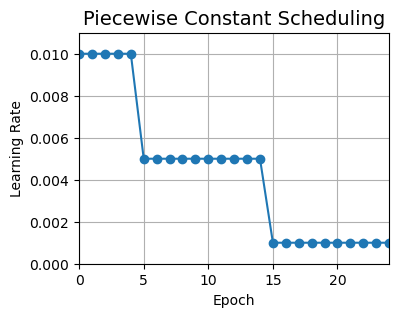

In [27]:
# Plot the learning rate schedule over epochs using the piecewise constant function
plt.figure(figsize=(4, 3))  # Width: 4 inches, Height: 3 inches
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
# Set the axis limits for the plot
plt.axis([0, n_epochs - 1, 0, 0.011])
# Set labels for the x and y axes
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
# Set the title of the plot
plt.title("Piecewise Constant Scheduling", fontsize=14)
# Enable grid on the plot
plt.grid(True)
# Display the plot
plt.show()

In [32]:
# Training a neural network on Fashion MNIST using tf.keras Piecewise Constant Scheduling

# Importing essential package
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Loading Fashion MNIST dataset and preprocessing
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
# Scaling pixel values to the range [0, 1]
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
# Splitting training set into validation and training subsets
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
# Calculating mean and standard deviation of training pixel values
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
# Standardizing the input features using mean and standard deviation
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

# Setting random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Define the neural network architecture using a Sequential model.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # Input layer: Flatten the 28x28 input images into a 1D array.
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),  # Hidden layer with 300 neurons, SELU activation function, and LeCun normal initialization.
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),  # Hidden layer with 100 neurons, SELU activation function, and LeCun normal initialization.
    keras.layers.Dense(10, activation="softmax")  # Output layer with 10 neurons (for class probabilities) and softmax activation function.
])

# Define a piecewise constant learning rate schedule with specified boundaries and corresponding values.
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],  # Learning rate boundaries at 5 and 15 epochs.
    values=[0.01, 0.005, 0.001])  # Learning rate values for different intervals.
# Define the optimizer with SGD (Stochastic Gradient Descent) and using the defined learning rate schedule.
optimizer = keras.optimizers.SGD(learning_rate)

# Compile the model with sparse categorical crossentropy loss function, SGD optimizer, and accuracy metric.
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])  

# Set the number of epochs for training.
n_epochs = 25  

# Fit the model to the training data without specifying any callbacks for dynamic learning rate adjustments.
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))  


Epoch 1/25
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4861 - accuracy: 0.8297 - val_loss: 0.4008 - val_accuracy: 0.8604
Epoch 2/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3788 - accuracy: 0.8659 - val_loss: 0.3706 - val_accuracy: 0.8696
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3443 - accuracy: 0.8779 - val_loss: 0.3748 - val_accuracy: 0.8654
Epoch 4/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3211 - accuracy: 0.8850 - val_loss: 0.3440 - val_accuracy: 0.8768
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3036 - accuracy: 0.8915 - val_loss: 0.3361 - val_accuracy: 0.8776
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2759 - accuracy: 0.9019 - val_loss: 0.3296 - val_accuracy: 0.8844
Epoch 7/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2683 - accuracy: 0.9055 - val_loss: 0.3266 - val_accuracy:

#### 6.4. Performance scheduling
*  Performance scheduling involves dynamically adjusting the learning rate during training based on the validation error. 
* At intervals defined by parameter N, the validation error is measured, and if it ceases to decrease for a set number of consecutive checks, the learning rate is reduced by a specified factor λ. 
* This adaptive strategy aims to prevent overshooting of the optimal model parameters by iteratively fine-tuning the learning rate according to the observed performance, potentially enhancing convergence and model generalization.

In [28]:
# Training a neural network on Fashion MNIST using Performance Scheduling

# Importing essential package
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Loading Fashion MNIST dataset and preprocessing
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
# Scaling pixel values to the range [0, 1]
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
# Splitting training set into validation and training subsets
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
# Calculating mean and standard deviation of training pixel values
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
# Standardizing the input features using mean and standard deviation
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

# Setting random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Define a learning rate scheduler to dynamically adjust the learning rate during training based on validation error.
# The learning rate is reduced by a factor of 0.5 if the validation error does not decrease for 5 consecutive epochs.
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)  

# Define the neural network architecture using a Sequential model.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # Input layer: Flatten the 28x28 input images into a 1D array.
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),  # Hidden layer with 300 neurons, SELU activation function, and LeCun normal initialization.
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),  # Hidden layer with 100 neurons, SELU activation function, and LeCun normal initialization.
    keras.layers.Dense(10, activation="softmax")  # Output layer with 10 neurons (for class probabilities) and softmax activation function.
])

# Define the optimizer with SGD (Stochastic Gradient Descent) and set learning rate to 0.02 and momentum to 0.9.
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)  

# Compile the model with sparse categorical crossentropy loss function and accuracy metric.
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])  

# Set the number of epochs for training.
n_epochs = 25  

# Fit the model to the training data while utilizing the defined learning rate scheduler callback for dynamic adjustment 
# of the learning rate during training based on validation performance.
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])  

Epoch 1/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5892 - accuracy: 0.8073 - val_loss: 0.5382 - val_accuracy: 0.8446 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4871 - accuracy: 0.8413 - val_loss: 0.5019 - val_accuracy: 0.8482 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5041 - accuracy: 0.8432 - val_loss: 0.5187 - val_accuracy: 0.8538 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5211 - accuracy: 0.8468 - val_loss: 0.6138 - val_accuracy: 0.8392 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5240 - accuracy: 0.8493 - val_loss: 0.4395 - val_accuracy: 0.8656 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5049 - accuracy: 0.8525 - val_loss: 0.5492 - val_accuracy: 0.8486 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 2s

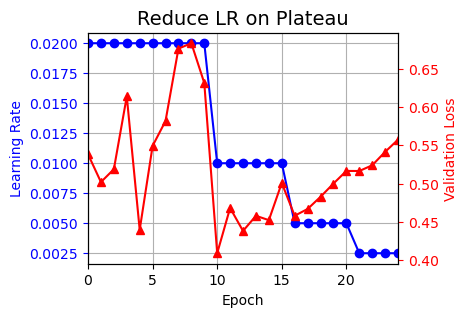

In [30]:
# Plot learning rate over epochs with blue circles and solid line.
plt.figure(figsize=(4, 3))  # Width: 4 inches, Height: 3 inches
plt.plot(history.epoch, history.history["lr"], "bo-")  
plt.xlabel("Epoch")  # Label x-axis as 'Epoch'.
plt.ylabel("Learning Rate", color='b')  # Label left y-axis as 'Learning Rate' in blue.
plt.tick_params('y', colors='b')  # Set tick color of left y-axis to blue.
plt.gca().set_xlim(0, n_epochs - 1)  # Set x-axis limits from 0 to (n_epochs - 1).
plt.grid(True)  # Show grid lines.

ax2 = plt.gca().twinx()  # Create a twin Axes sharing the same x-axis.
ax2.plot(history.epoch, history.history["val_loss"], "r^-")  # Plot validation loss over epochs with red triangles and solid line.
ax2.set_ylabel('Validation Loss', color='r')  # Label right y-axis as 'Validation Loss' in red.
ax2.tick_params('y', colors='r')  # Set tick color of right y-axis to red.

plt.title("Reduce LR on Plateau", fontsize=14)  # Set plot title as "Reduce LR on Plateau" with font size 14.
plt.show()  # Display the plot.